# Proyecto2

### Resultados del Proyecto 1: Análisis de mercado inmobiliario

<font color=green>
Se importa las librerías necesarias para trabajar en la consigna.
</font>

In [1]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font color=green>
Se carga el dataset usando las funcionalidades de Pandas. Se imprime cuántas filas y columnas tiene.
</font>

In [2]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
propiedadesProperati = pd.read_csv('properati.csv')
# tupla
tamanoDataset = propiedadesProperati.shape
print('El dataset tiene',tamanoDataset[0],'filas y',tamanoDataset[1],'columnas')

El dataset tiene 146660 filas y 19 columnas


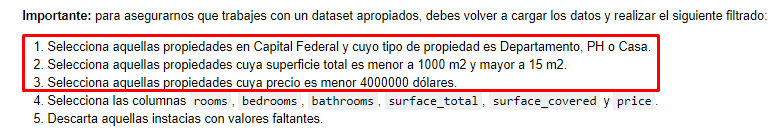

<font color=green>
Se señalan las premisas que se van a mantener en el proyecto 2.
</font>

In [3]:
propiedades =  ['Departamento', 'PH','Casa']

In [4]:
df = propiedadesProperati[(propiedadesProperati.l2 == 'Capital Federal') & (propiedadesProperati.property_type.isin(propiedades))
         & (propiedadesProperati.surface_total <= 1000) & (propiedadesProperati.surface_total >= 15) & (propiedadesProperati.price <= 4000000)]

In [5]:
# Se resetea index
df = df.reset_index(drop=True)

In [6]:
print(df.shape)

(82373, 19)


<font color=green>
Se eliminaron aquellas columnas que no me 'aportan' a mi estudio estadistico
</font>

In [7]:
df = df[['rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered', 'price']]
df.dropna(inplace=True)

In [8]:
print(df.shape)

(81019, 6)


In [9]:
# Se resetea index
df = df.reset_index(drop=True)

<font color=green>
Checkpoint. Tamaño de dataset 81019 filas y 6 columnas
</font>

In [10]:
df.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

<font color=green>
Separo las columnas, 'x' es con la que voy a entrenar el modelo 
</font>

<font color=green>
'y' contiene la variable 'price' o precio para predecir mi modelo
</font>

In [11]:
X = df.loc[:,['rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered']]
y = df.loc[:,['price']]

<font color=green>
Aquí se usa la función train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba. Para el modelo se asignó un 25% para test.
</font>

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
print('Datos de entrenamiento:')
print(X_train.shape, y_train.shape)
print('Datos de prueba:')
print(X_test.shape, y_test.shape)

Datos de entrenamiento:
(60764, 5) (60764, 1)
Datos de prueba:
(20255, 5) (20255, 1)


<font color=green>
Para las gráficas de mi modelo, se opta por el uso de la función r2_score (el coeficiente de determinación) que proporciona una medida de qué tan bien es probable que el modelo prediga las muestras futuras. También se importa la función de error cuadrático medio (mean_squared_error) que es el promedio del cuadrado de la diferencia entre los valores originales y los valores predichos.
</font>

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#### DecisionTreeRegressor

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

In [16]:
print ("R2 of Linear Regresson train:", tree_model.score(X_train,y_train) )
print('MAE train: ',mean_absolute_error(y_train, tree_model.predict(X_train)))
print('MSE train: ',mean_squared_error(y_train, tree_model.predict(X_train)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, tree_model.predict(X_train))))

R2 of Linear Regresson train: 0.6756028215737884
MAE train:  78894.14673279082
MSE train:  28609828382.93865
RMSE train: 169144.4009801644


In [17]:
print ("R2 of Linear Regresson test:", tree_model.score(X_test,y_test) )
print('MAE test: ',mean_absolute_error(y_test, tree_model.predict(X_test)))
print('MSE test: ',mean_squared_error(y_test, tree_model.predict(X_test)))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, tree_model.predict(X_test))))

R2 of Linear Regresson test: 0.6683677446347567
MAE test:  81000.06030118825
MSE test:  30806432240.636
RMSE test: 175517.61233744037


<font color=green>
Con un modelo árbol de desición, se tiene un score de entrenamiento 67.5% y score de prueba 66.8%
</font>

#### KNeighborsRegressor

In [18]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights = 'distance')
knn_model.fit(X_train, y_train)
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

In [19]:
print ("R2 of Linear Regresson train:", knn_model.score(X_train,y_train) )
print('MAE train: ',mean_absolute_error(y_train, knn_model.predict(X_train)))
print('MSE train: ',mean_squared_error(y_train, knn_model.predict(X_train)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, knn_model.predict(X_train))))

R2 of Linear Regresson train: 0.9650508827333838
MAE train:  24649.14793902091
MSE train:  3082296375.030059
RMSE train: 55518.43275012416


In [20]:
print ("R2 of Linear Regresson test:", knn_model.score(X_test,y_test) )
print('MAE test: ',mean_absolute_error(y_test, knn_model.predict(X_test)))
print('MSE test: ',mean_squared_error(y_test, knn_model.predict(X_test)))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, knn_model.predict(X_test))))

R2 of Linear Regresson test: 0.8106532008926289
MAE test:  49697.197093923496
MSE test:  17589059092.753986
RMSE test: 132623.75010816872


<font color=green>
Con un modelo vecinos cercanos, se tiene un score de entrenamiento 96.5% y score de prueba 81.06%
</font>

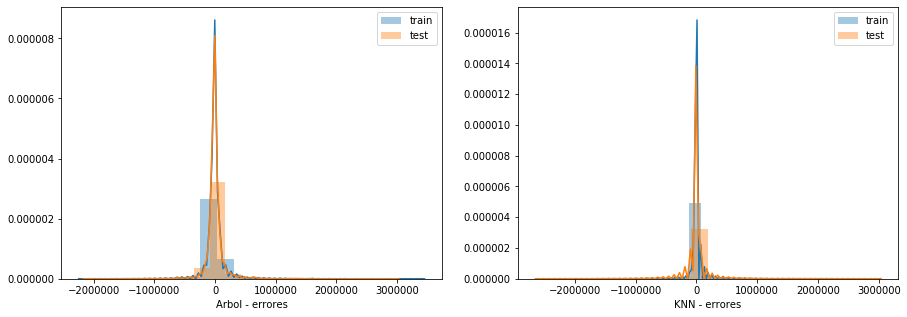

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot((y_train) - (y_train_pred_tree).reshape(-1,1), bins = 20, label = 'train')
sns.distplot((y_test) - (y_test_pred_tree).reshape(-1,1), bins = 20, label = 'test')
plt.xlabel('Arbol - errores')
plt.legend()

plt.subplot(1,2,2)
sns.distplot((y_train) - (y_train_pred_knn).reshape(-1,1), bins = 20, label = 'train')
sns.distplot((y_test) - (y_test_pred_knn).reshape(-1,1), bins = 20, label = 'test')
plt.xlabel('KNN - errores')
plt.legend()
plt.show()

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 191479.28864256426
Raíz del error cuadrático medio en Test: 196171.93348241155


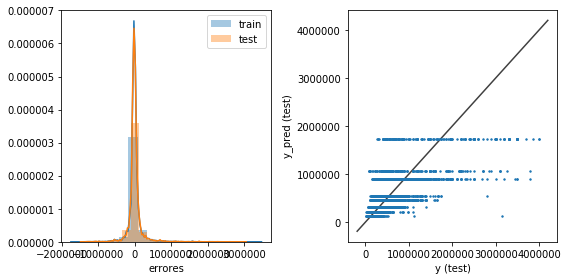

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 55518.43275012416
Raíz del error cuadrático medio en Test: 132623.75010816872


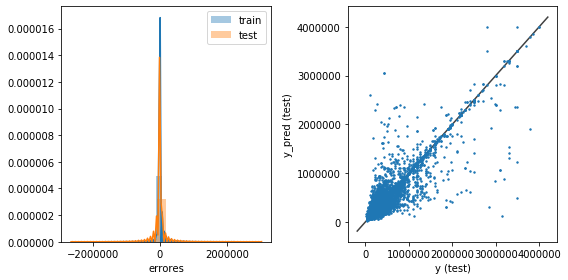

In [22]:
#from sklearn.linear_model import LinearRegression
#linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5, weights = 'distance')

#linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_model, knn_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - (y_train_pred).reshape(-1,1), bins = 20, label = 'train')
    sns.distplot(y_test - (y_test_pred).reshape(-1,1), bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Desarrollo proyecto 2

## PARTE A - Transformación de Datos

#### Elige cuáles de las siguientes tareas son apropiadas para su dataset. 
#### Justifica e implementa:

#### 1. Detección y eliminación de Outliers

#### 2. Encoding

#### 3. Imputación de valores faltantes

#### 4. Escalado de datos

#### 5. Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

#### Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.


<font color=green>
Check: Eliminación de instancias repetidas
</font>

In [23]:
sin_dup = propiedadesProperati.drop_duplicates()
print(f'Numero de instancias duplicadas', propiedadesProperati.shape[0]-sin_dup.shape[0])
print(f'Numero de instancias del dataset filtrado', sin_dup.shape[0])

Numero de instancias duplicadas 2358
Numero de instancias del dataset filtrado 144302


In [24]:
# Se resetea index
sin_dup = sin_dup.reset_index(drop=True)

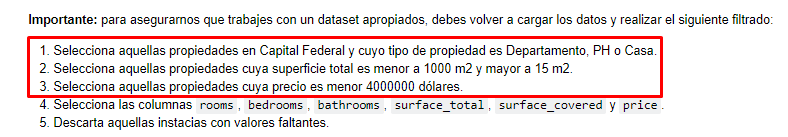

<font color=green>
Se realiza los filtros del dataset para tener uno similar al del primer proyecto. Se crea un nuevo dataframe con las siguientes premisas.
</font>

In [25]:
df2 = sin_dup[(sin_dup.l2 == 'Capital Federal') & (sin_dup.property_type.isin(propiedades))
         & (sin_dup.surface_total <= 1000) & (sin_dup.surface_total >= 15) & (sin_dup.price <= 4000000)]

In [26]:
print(df2.shape)

(80967, 19)


In [27]:
# Se resetea index
df2 = df2.reset_index(drop=True)

<font color=green>
Se eliminan aquellas columnas que no me 'aportan' a mi estudio estadistico
</font>

<font color=green>
Para este proyecto, se opta por mantener en el dataset las columnas de 'l3' que son los barrios en la ciudad de Buenos Aires y 'property_type', con el fín de mejorar el modelo que predice el precio.
</font>

In [28]:
df_O =  df2.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2',
                             'currency','title', 'description','operation_type'], axis=1, inplace= False)
df_O.shape

(80967, 8)

In [29]:
df_O.isna().sum()

l3                   0
rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    503
price                0
property_type        0
dtype: int64

### Manejo de Outliers

<font color=green>
Se construye función para quitar los outliers del dataset (uso de método intercuartil), de modo que, se va a trabajar en un rango donde se concentran la mayoría de muestras
</font>

In [30]:
Q1 = df_O.quantile(0.25)
Q3 = df_O.quantile(0.75)
IQR = Q3 - Q1

In [31]:
no_outliers = df_O[(Q1 - 1.5*IQR < df_O) &  (df_O < Q3 + 1.5*IQR)]
outliers = df_O[~((Q1 - 1.5*IQR >= df_O) |  (df_O >= Q3 + 1.5*IQR)).any(axis=1)]

In [32]:
print(no_outliers.shape)
print(outliers.shape)

(80967, 8)
(70252, 8)


In [33]:
# Se resetea index
outliers = outliers.reset_index(drop=True)

<font color=green>
En la siguiente representación gráfica se visualizan para rooms, bedrooms, bathrooms, surface_total, surface_covered y price, la distribución de los datos por debajo del límite inferior (cuartil 1) y por encima del límite superior (cuartil 3). Para price, aunque se ven algunos datos atípicos, se puede obtener rápidamente una idea del rango de valores comunes y limitantes de la distribución. Por ejemplo, la mediana de esta variable es aproximadamente de 160000 USD (la línea que divide la caja del diagrama).
</font>

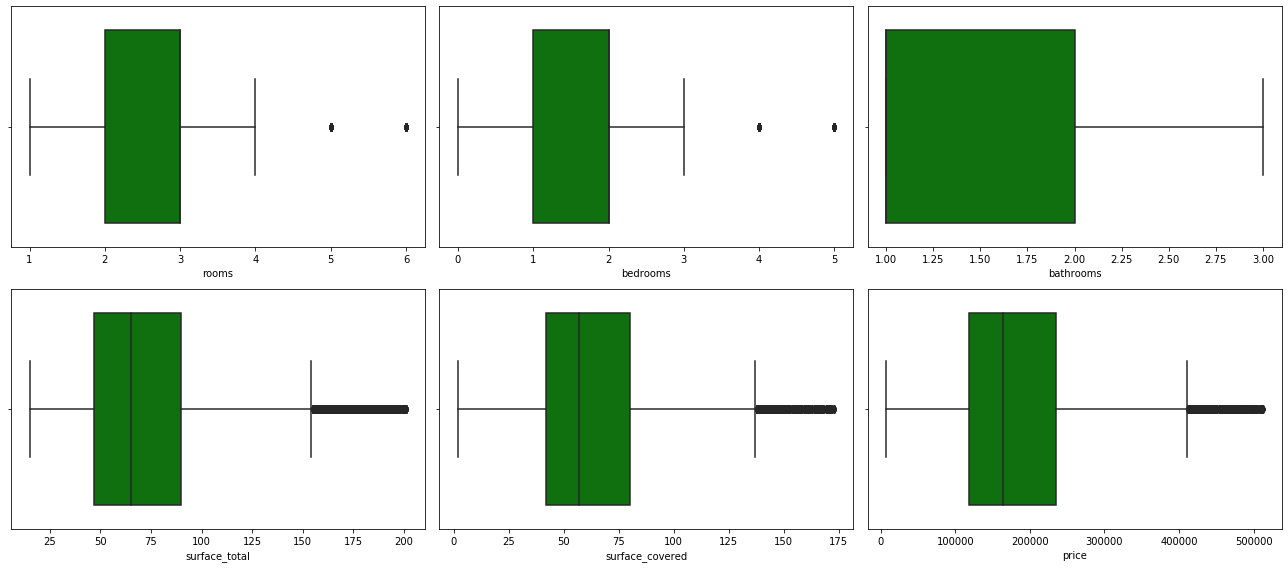

In [34]:
plt.figure(figsize = (6*3,8))
    
plt.subplot(2,3,1)
sns.boxplot(outliers.rooms, color = 'green')

plt.subplot(2,3,2)
sns.boxplot(outliers.bedrooms, color = 'green')

plt.subplot(2,3,3)
sns.boxplot(outliers.bathrooms, color = 'green')

plt.subplot(2,3,4)
sns.boxplot(outliers.surface_total, color = 'green')

plt.subplot(2,3,5)
sns.boxplot(outliers.surface_covered, color = 'green')

plt.subplot(2,3,6)
sns.boxplot(outliers.price, color = 'green')

plt.tight_layout()
# plt.savefig('Retiro_outliers_Proy2.png', dpi = 300)
plt.show()

In [35]:
# Existen datos null en algunas columnas
outliers.isna().sum()

l3                   0
rooms                0
bedrooms             0
bathrooms          772
surface_total        0
surface_covered    456
price                0
property_type        0
dtype: int64

### Imputación de valores faltantes

<font color=green>
Una de las premisas del proyecto 1 es que surface_covered no debe ser mayor a surface_total. En el proyecto 1 se eliminaron estas instancias, en este caso se van a intercambiar los datos entre las categorías.
</font>

In [36]:
# Se copia dataset sin outliers
df_noNaN = outliers.copy()

In [37]:
df_noNaN.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,70252.000000,70252.000000,69480.000000,70252.000000,69796.000000,70252.000000
mean,2.734954,1.792248,1.348474,73.134743,64.480171,186532.679867
std,1.003111,0.842772,0.567786,34.961827,29.048797,92761.998077
min,1.000000,0.000000,1.000000,15.000000,2.000000,7500.000000
25%,2.000000,1.000000,1.000000,47.000000,42.000000,118000.000000
50%,3.000000,2.000000,1.000000,65.000000,57.000000,164000.000000
75%,3.000000,2.000000,2.000000,90.000000,80.000000,235000.000000
max,6.000000,5.000000,3.000000,201.000000,173.000000,512299.000000


<font color=green>
Se reemplazan los datos null. Para 'bathrooms' se imputará con vecinos cercanos.
</font>

In [38]:
from sklearn.impute import KNNImputer

#imp = SimpleImputer(missing_values=np.nan,strategy='median')
imp = KNNImputer(n_neighbors=2)
df_noNaN['bathrooms'] = np.round(imp.fit_transform(df_noNaN[['bathrooms']]),0)

<font color=green>
Para 'surface_covered' se usará el promedio de su categoría agrupada en tipo de propiedad.
</font>

In [39]:
valor_medio_surfaceC = df_noNaN.groupby('property_type')['surface_covered'].mean()

In [40]:
valor_medio_surfaceC = dict(valor_medio_surfaceC)
valor_medio_surfaceC

{'Casa': 113.78457446808511,
 'Departamento': 61.77945431658792,
 'PH': 80.75460434396037}

In [41]:
df_noNaN['surface_covered'] = df_noNaN.surface_covered.fillna(df_noNaN.property_type.map(valor_medio_surfaceC))

In [42]:
condicionD = df_noNaN.loc[df_noNaN.surface_total < df_noNaN.surface_covered]
len(condicionD)

818

In [43]:
condicionD[['surface_total', 'surface_covered']].head()

,surface_total,surface_covered
435,35.0,61.779454
514,43.0,44.000000
553,65.0,66.000000
743,44.0,45.000000
815,78.0,79.000000


<font color=green>
Existen 818 instancias donde la superficie cubierta es mayor a la superficie total. Se procede a intercambiar estas filas en el dataset de estudio.
</font>

In [44]:
df_noNaN.loc[condicionD.index, 'surface_total'] = condicionD.surface_covered
df_noNaN.loc[condicionD.index, 'surface_covered'] = condicionD.surface_total

In [45]:
condicionDD = df_noNaN.loc[df_noNaN.surface_total < df_noNaN.surface_covered]
len(condicionDD)

0

<font color=green>
Finalmente se confirma que no existen instancias donde la superficie cubierta es mayor a la superficie total.
</font>

In [46]:
listaIndex = [435, 514, 553, 743, 815]

In [47]:
df_noNaN[['surface_total', 'surface_covered']][df_noNaN.index.isin(listaIndex)]

,surface_total,surface_covered
435,61.779454,35.0
514,44.000000,43.0
553,66.000000,65.0
743,45.000000,44.0
815,79.000000,78.0


In [48]:
# Se revisa nuevamente los valores faltantes
df_noNaN.isna().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

### Encoding

<font color=blue>
'Property_type' entra como variable de entrenamiento al modelo con el fín de mejorar la predicción de precio.
</font

<font color=green>
Usando LabelEncoder de Scikit-learn podemos transformar nuestras variables categóricas en numéricas sin pasar por variables dummies. Luego, vamos a utilizar OneHotEncoder para transformar las categorías numéricas en categorías binarias.
</font

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
 
df_enc = df_noNaN.copy()

In [50]:
df_enc.isna().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [51]:
# Llamamos al algoritmo
le_prop_type = LabelEncoder()
# Lo fiteamos con las categorias que tenemos en nuestro dataset.
le_prop_type.fit(df_enc['property_type'])

LabelEncoder()

In [52]:
# Estas son las categorias que eligio el algoritmo. Les asignara un numero a cada categoria, 
# yendo de izquierda a derecha [recordemos que python cuenta desde 0]
le_prop_type.classes_

array(['Casa', 'Departamento', 'PH'], dtype=object)

In [53]:
#Transformamos la categoria "property_type" en numeros.
cat_prop_type = le_prop_type.transform(df_enc['property_type'])

[2 2 2 ... 2 2 1]


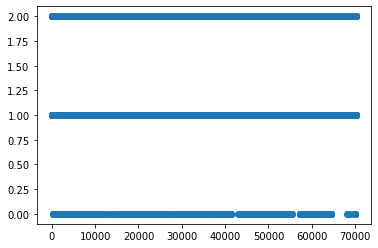

In [54]:
#Les proponemos formas de visualizar que hizo sckit-learn
print(cat_prop_type)
plt.plot(cat_prop_type,'o')

In [55]:
# Actualizamos el viejo dataset
df_enc.loc[:,'property_type_category'] = cat_prop_type

<font color=green>
Ahora vamos a transformar las categorías numéricas que acabamos de definir, en binarias. De lo contrario, el algoritmo de ML que vayamos a usar las interpretaria como variables categoricas ordinales [y no lo son!].
</font

In [56]:
# creating instance of one-hot-encoder

enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df_enc[['property_type_category']]).toarray())
# merge with main df bridge_df on key values
df_enc = df_enc.join(enc_df)
df_enc.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,property_type_category,0,1,2
0,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2,0.0,0.0,1.0
1,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2,0.0,0.0,1.0
2,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2,0.0,0.0,1.0
3,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2,0.0,0.0,1.0
4,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2,0.0,0.0,1.0


In [57]:
df_enc.rename(columns={0:'Casa',1:'Departamento',2:'PH'}, inplace=True)
df_enc.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,property_type_category,Casa,Departamento,PH
0,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2,0.0,0.0,1.0
1,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2,0.0,0.0,1.0
2,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2,0.0,0.0,1.0
3,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2,0.0,0.0,1.0
4,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2,0.0,0.0,1.0


<font color=blue>
Ahora entra el 'l3' entra como variable de entrenamiento al modelo con el fín de mejorar la predicción de precio.
</font

<font color=green>
Usando LabelEncoder de Scikit-learn podemos transformar nuestras variables categóricas en numéricas sin pasar por variables dummies. Luego, vamos a utilizar OneHotEncoder para transformar las categorías numéricas en categorías binarias.
</font

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
 
(df_enc['l3']).head()

0           Boedo
1         Palermo
2         Palermo
3    Villa Crespo
4    Villa Crespo
Name: l3, dtype: object

In [59]:
# Llamamos al algoritmo
le_prop_type2 = LabelEncoder()
# Lo fiteamos con las categorias que tenemos en nuestro dataset.
le_prop_type2.fit(df_enc['l3'])

LabelEncoder()

In [60]:
# Estas son las categorias que eligio el algoritmo. Les asignara un numero a cada categoria, 
# yendo de izquierda a derecha [recordemos que python cuenta desde 0]
le_prop_type2.classes_

array(['Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque'], dtype=object)

In [61]:
#Transformamos la categoria "l3" en numeros.
cat_prop_type2 = le_prop_type2.transform(df_enc['l3'])

[ 8 26 26 ... 26 26 26]


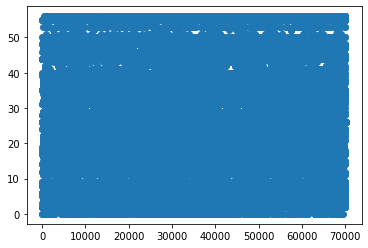

In [62]:
#Les proponemos formas de visualizar que hizo sckit-learn
print(cat_prop_type2)
plt.plot(cat_prop_type2,'o')

In [63]:
# Actualizamos el viejo dataset
df_enc.loc[:,'l3_category'] = cat_prop_type2

<font color=green>
Ahora vamos a transformar las categorías numéricas que acabamos de definir, en binarias. De lo contrario, el algoritmo de ML que vayamos a usar las interpretaria como variables categoricas ordinales [y no lo son!].
</font

In [64]:
# creating instance of one-hot-encoder

enc2 = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df2 = pd.DataFrame(enc2.fit_transform(df_enc[['l3']]).toarray())
# merge with main df bridge_df on key values
df_enc = df_enc.join(enc_df2)
df_enc.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,property_type_category,Casa,...,47,48,49,50,51,52,53,54,55,56
0,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color=green>
En total son 57 barrios, se cambia en nombre de la categoría nominal a una referencia genérica. Por ejemplo b1 corresponde a barrio 1
</font

In [65]:
df_enc.rename(columns={0:'b1',1:'b2',2:'b3',3:'b4',4:'b5',5:'b6',6:'b7',7:'b8',8:'b9',9:'b10',10:'b11',
                     11:'b12',12:'b13',13:'b14',14:'b15',15:'b16',16:'b17',17:'b18',18:'b19',19:'b20',20:'b21',
                     21:'b22',22:'b23',23:'b24',24:'b25',25:'b26',26:'b27',27:'b28',28:'b29',29:'b30',30:'b31',
                     31:'b32',32:'b33',33:'b34',34:'b35',35:'b36',36:'b37',37:'b38',38:'b39',39:'b40',40:'b41',
                     41:'b42',42:'b43',43:'b44',44:'b45',45:'b46',46:'b47',47:'b48',48:'b49',49:'b50',50:'b51',
                     51:'b52',52:'b53',53:'b54',54:'b55',55:'b56',56:'b57'}, inplace=True)

<font color=green>
Se eliminan las columnas base del encodeo. De tal manera, me quedo con las categorías necesarias para continuar los siguientes modelamientos.
</font

In [66]:
# Nombres columnas
df_end = df_enc.drop(['l3', 'property_type', 'property_type_category','l3_category'], axis = 1) 
df_end.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH,b1,...,b48,b49,b50,b51,b52,b53,b54,b55,b56,b57
0,2.0,1.0,2.0,70.0,58.0,159000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,45.0,45.0,125000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,1.0,85.0,50.0,295000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,56.0,56.0,150000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,70.0,70.0,159500.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Nombres columnas
print(df_end.columns)

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'Casa', 'Departamento', 'PH', 'b1', 'b2', 'b3', 'b4', 'b5',
       'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16',
       'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26',
       'b27', 'b28', 'b29', 'b30', 'b31', 'b32', 'b33', 'b34', 'b35', 'b36',
       'b37', 'b38', 'b39', 'b40', 'b41', 'b42', 'b43', 'b44', 'b45', 'b46',
       'b47', 'b48', 'b49', 'b50', 'b51', 'b52', 'b53', 'b54', 'b55', 'b56',
       'b57'],
      dtype='object')


In [68]:
df_end.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
                  ..
b53                0
b54                0
b55                0
b56                0
b57                0
Length: 66, dtype: int64

<font color=blue>
Evaluando modelo con árbol de decisión
</font>

In [69]:
print(df_end.shape)

(70252, 66)


<font color=green>
Checkpoint. Tamaño de dataset 70252 filas y 66 columnas
</font>

In [70]:
df_end.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH,b1,...,b48,b49,b50,b51,b52,b53,b54,b55,b56,b57
0,2.0,1.0,2.0,70.0,58.0,159000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,45.0,45.0,125000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,1.0,85.0,50.0,295000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,56.0,56.0,150000.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,70.0,70.0,159500.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
train_dataset = df_end.sample(frac=0.8, random_state=0)
test_dataset = df_end.drop(train_dataset.index)

In [72]:
train_labels = train_dataset.pop('price')
test_labels = test_dataset.pop('price')

In [73]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
rooms,56202.0,2.733977,1.003115,1.0,2.0,3.0,3.0,6.0
bedrooms,56202.0,1.791894,0.842227,0.0,1.0,2.0,2.0,5.0
bathrooms,56202.0,1.346233,0.566523,1.0,1.0,1.0,2.0,3.0
surface_total,56202.0,73.238538,34.902309,15.0,47.0,65.0,90.0,201.0
surface_covered,56202.0,64.351067,28.898732,2.0,42.0,57.0,80.0,173.0
...,...,...,...,...,...,...,...,...
b53,56202.0,0.000356,0.018861,0.0,0.0,0.0,0.0,1.0
b54,56202.0,0.004092,0.063841,0.0,0.0,0.0,0.0,1.0
b55,56202.0,0.000623,0.024947,0.0,0.0,0.0,0.0,1.0
b56,56202.0,0.039322,0.194363,0.0,0.0,0.0,0.0,1.0


In [74]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
  
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,b1,b2,...,b48,b49,b50,b51,b52,b53,b54,b55,b56,b57
30699,-0.731698,-0.940237,-0.611154,-0.694468,-0.773427,-0.105183,0.372863,-0.353561,-0.074594,-0.044685,...,-0.073501,-0.081848,-0.055405,-0.093298,-0.041794,-0.018867,-0.064102,-0.024963,-0.202315,-0.12886
22587,0.265196,0.247091,1.153998,0.021817,-0.081355,-0.105183,0.372863,-0.353561,-0.074594,-0.044685,...,-0.073501,-0.081848,-0.055405,-0.093298,-0.041794,-0.018867,-0.064102,-0.024963,-0.202315,-0.12886
61253,-1.728593,-0.940237,-0.611154,-0.923679,-0.946445,-0.105183,0.372863,-0.353561,-0.074594,-0.044685,...,-0.073501,-0.081848,-0.055405,-0.093298,-0.041794,-0.018867,-0.064102,-0.024963,-0.202315,-0.12886
44280,3.255880,1.434419,1.153998,2.485837,3.136779,-0.105183,0.372863,-0.353561,-0.074594,-0.044685,...,-0.073501,-0.081848,-0.055405,-0.093298,-0.041794,-0.018867,-0.064102,-0.024963,-0.202315,-0.12886
43195,-0.731698,-0.940237,-0.611154,-1.095588,-1.015652,-0.105183,0.372863,-0.353561,-0.074594,-0.044685,...,-0.073501,-0.081848,-0.055405,-0.093298,-0.041794,-0.018867,-0.064102,-0.024963,-0.202315,-0.12886


In [75]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [76]:
import tensorflow as tf

In [77]:
from tensorflow import keras
from tensorflow.keras import layers

In [78]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               16896     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8

In [79]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [81]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:2746458791.0150,  mae:36338.7305,  mse:2746456064.0000,  val_loss:2359675348.9576,  val_mae:34212.8438,  val_mse:2359675904.0000,  
....................................................................................................
Epoch: 100, loss:1264301803.8738,  mae:24644.3008,  mse:1264302208.0000,  val_loss:1414346904.6298,  val_mae:25852.3398,  val_mse:1414346752.0000,  
..................

KeyboardInterrupt: 

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

<font color=green>
Separo las columnas, 'X' es con la que voy a entrenar el modelo 
</font

<font color=green>
'y' contiene la variable 'price' o precio para predecir mi modelo
</font>

In [ ]:
X = df_end.loc[:,:].drop('price', axis=1)
y = df_end.loc[:,['price']]

<font color=green>
Aquí se usa la función train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba. Para el modelo se asignó un 25% para test.
</font>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print('Datos de entrenamiento:')
print(X_train.shape, y_train.shape)
print('Datos de prueba:')
print(X_test.shape, y_test.shape)

<font color=green>
Para las gráficas del modelo 2, se opta por el uso de la función r2_score (el coeficiente de determinación) que proporciona una medida de qué tan bien es probable que el modelo prediga las muestras futuras. También se importa la función de error cuadrático medio (mean_squared_error) que es el promedio del cuadrado de la diferencia entre los valores originales y los valores predichos.
</font>

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

In [ ]:
print ("R2 of Linear Regresson train:", tree_model.score(X_train,y_train) )
print('MAE train: ',mean_absolute_error(y_train, tree_model.predict(X_train)))
print('MSE train: ',mean_squared_error(y_train, tree_model.predict(X_train)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, tree_model.predict(X_train))))

In [ ]:
print ("R2 of Linear Regresson test:", tree_model.score(X_test,y_test) )
print('MAE test: ',mean_absolute_error(y_test, tree_model.predict(X_test)))
print('MSE test: ',mean_squared_error(y_test, tree_model.predict(X_test)))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, tree_model.predict(X_test))))

<font color=green>
Con un modelo árbol de desición, se tiene un score de entrenamiento 66.7% y score de prueba 65.7%
</font>

#### KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights = 'distance')
knn_model.fit(X_train, y_train)
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

In [ ]:
print ("R2 of Linear Regresson train:", knn_model.score(X_train,y_train) )
print('MAE train: ',mean_absolute_error(y_train, knn_model.predict(X_train)))
print('MSE train: ',mean_squared_error(y_train, knn_model.predict(X_train)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, knn_model.predict(X_train))))

In [ ]:
print ("R2 of Linear Regresson test:", knn_model.score(X_test,y_test) )
print('MAE test: ',mean_absolute_error(y_test, knn_model.predict(X_test)))
print('MSE test: ',mean_squared_error(y_test, knn_model.predict(X_test)))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, knn_model.predict(X_test))))

<font color=green>
Con un modelo KNN, se tiene un score de entrenamiento 97.4% y score de prueba 82.2%
</font>

In [ ]:
hhh

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

In [ ]:
model.compile(   
    loss='mse', # keras.losses.mean_squared_error   
    optimizer=keras.optimizers.SGD(lr=0.02), ) 

In [ ]:
RFR.fit(X_train,y_train.values.ravel())

In [ ]:
model.fit(X_train,y_train.reshape(-1,1))

In [ ]:
model.fit(X_train.reshape(-1,1),y_train.values.ravel())

In [ ]:
scores = cross_validate(model,X_train,y_train.values.ravel(), scoring =('r2','neg_mean_squared_error'),cv=4, return_train_score=True ) 

In [ ]:
train_r2= np.mean(scores['train_r2'])
test_r2= np.mean(scores['test_r2'])
print('r2 train:',train_r2)
print('r2 test:',test_r2)
print()

train_mse= abs(np.mean(scores['train_neg_mean_squared_error']))
test_mse= abs(np.mean(scores['test_neg_mean_squared_error']))
print('MSE train:',train_mse)
print('MSE test:',test_mse)
print()

### Escalado de datos

<font color=green>
La escala es importante si necesito especificar que una modificación en una cantidad no es igual a otra modificación en otra. En pocas palabras, ponemos todas nuestras características en la misma escala para que ninguna esté dominada por otra. Por ejemplo, puedo utilizar la clase StandardScaler del paquete sklearn.preprocessing para ajustar y transformar el conjunto de datos.
</font>

In [ ]:
# CON STANDARDSCALER DE SCIKIT LEARN

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaler= pd.DataFrame(scaler.fit_transform(X_train))

In [ ]:
X_test_scaler = pd.DataFrame(scaler.transform(X_test))

<font color=green>
PCA (análisis de componentes principales) es un método para extraer variables importantes (en forma de componentes) de un gran conjunto de variables disponibles en un conjunto de datos. La idea es calcular y clasificar la importancia de las características / dimensiones.

Para hacer eso, usamos SVD (descomposición de valores singulares). La SVD se utiliza en la matriz de covarianza para calcular y clasificar la importancia de las características.
</font>

In [ ]:
#reduccion

### Truncated SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
for i in range(1,66,5):
    svd = TruncatedSVD(n_components=i,n_iter=7,random_state=42)
    svd.fit(X)
    print(str(i)+' '+str(svd.explained_variance_ratio_.sum()))

<font color=green>
En base a los resultados, tomando 6 componentes tengo el 99% de las variaciones. 
</font>

In [ ]:
svd = TruncatedSVD(n_components=6,n_iter=7,random_state=42)

<font color=green>
Se ajusta el X_train y X_test conforme a lo calculado. 
</font>

In [ ]:
trun_X_train = svd.fit_transform(X_train)
X_train = trun_X_train
trun_X_test = svd.transform(X_test)
X_test = trun_X_test

<font color=green>
La validación cruzada repetida de k veces proporciona una forma de mejorar el rendimiento estimado de un modelo de aprendizaje automático.
</font>

In [ ]:
from sklearn.model_selection import cross_validate

<font color=green>
La profundidad máxima del árbol se probó con 10 para dejar los mismos parámetros del proyecto 1. Si se aumenta la profundidad, mejora el score en train y test. Sin embargo, tener un 'modelo perfecto' genera desconfianza.
</font>

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
scores = cross_validate(tree_model,X_train,y_train.values.ravel(), scoring =('r2','neg_mean_squared_error'),cv=4, return_train_score=True ) 

In [ ]:
train_maxe = np.mean(scores['train_r2'])
test_maxe = np.mean(scores['test_r2'])
print('R2 train:',train_maxe)
print('R2 test:',test_maxe)

In [ ]:
train_mse = abs(np.mean(scores['train_neg_mean_squared_error']))
test_mse = abs(np.mean(scores['test_neg_mean_squared_error']))
print('MSE train:',train_mse)
print('MSE test:',test_mse)

<font color=green>
Resultados: score de entrenamiento 79.3% y score de prueba 74.6%
</font>

### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
for i in range(1,66,5):
    pca = PCA(n_components=i)
    pca.fit(X)
    print(str(i)+' '+str(pca.explained_variance_ratio_.sum()))

<font color=green>
En base a los resultados, tomando 6 componentes tengo el 99% de las variaciones.
</font>

## PARTE B - Modelos Avanzados

#### 6. Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

#### 7. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

#### 8. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

### Random Forest Regressor

##### - Random Forest se considera como la “panacea” en todos los problemas de ciencia de datos.
##### - Util para regresión y clasificación.
##### - Un grupo de modelos “débiles”, se combinan en un modelo robusto.
##### - Sirve como una técnica para reducción de la dimensionalidad.
##### - Se generan múltiples árboles (a diferencia de CART).
##### - Cada árbol da una classificación (vota por una clase). Y el resultado es la clase con mayor número de votos en todo el bosque (forest).
##### - Para regresión, se toma el promedio de las salidas (predicciones) de todos los árboles.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

#### Para obtener los mejores resultados en cuanto a la medición de la calidad de la predicción de los modelos, es mejor realizar una Validación Cruzada sobre los datos de entrada.

#### La Validación Cruzada o k-fold Cross Validation consiste en tomar los datos originales y crear a partir de ellos dos conjuntos separados: un primer conjunto de entrenamiento (y prueba), y un segundo conjunto de validación.

#### Luego, el conjunto de entrenamiento se va a dividir en k subconjuntos y, al momento de realizar el entrenamiento, se va a tomar cada k subconjunto como conjunto de prueba del modelo, mientras que el resto de los datos se tomará como conjunto de entrenamiento.

#### Este proceso se repetirá k veces, y en cada iteración se seleccionará un conjunto de prueba diferente, mientras los datos restantes se emplearán, como se mencionó, como conjunto de entrenamiento. Una vez finalizadas las iteraciones, se calcula la precisión y el error para cada uno de los modelos producidos, y para obtener la precisión y el error final se calcula el promedio de los k modelos entrenados.

#### Una vez se cuenta con esta precisión promedio para un modelo, se puede repetir entonces el procedimiento del Cross Validation para todos los demás modelos de clasificación que se estén evaluando, y se seleccionará al final aquel que produzca el mejor valor de precisión y menor error promedio.

#### Entonces, puede utilizarse dicho modelo sobre el conjunto de validación generado en la primera parte, ya que, se supone, es este modelo el que mejor resultado en general ofreció durante la fase de entrenamiento.

In [ ]:
RFR = RandomForestRegressor(warm_start=True)
RFR.fit(X_train,y_train.values.ravel())

<font color=green>
La validación cruzada repetida de k veces proporciona una forma de mejorar el rendimiento estimado de un modelo de aprendizaje automático.
</font>

In [ ]:
tree_scores_RFR = cross_validate(RFR,X_train,y_train.values.ravel(), scoring =('r2','neg_mean_squared_error'),cv=4, return_train_score=True ) 

In [ ]:
train_r2= np.mean(tree_scores_RFR['train_r2'])
test_r2= np.mean(tree_scores_RFR['test_r2'])
print('r2 train:',train_r2)
print('r2 test:',test_r2)
print()

train_mse= abs(np.mean(tree_scores_RFR['train_neg_mean_squared_error']))
test_mse= abs(np.mean(tree_scores_RFR['test_neg_mean_squared_error']))
print('MSE train:',train_mse)
print('MSE test:',test_mse)
print()

<font color=green>
Resultados: score de entrenamiento 96.1% y score de prueba 84.1%
</font>

### XGBOOST

#### XGBoost Extreme Gradient Boosting es un algoritmo predictivo supervisado que utiliza el principio de boosting.
#### La idea detrás del boosting es generar múltiples modelos de predicción “débiles” secuenciualmente,y que cada uno de estos tome los resultados del modelo anterior, para generar un modelo más “fuerte”, con mejor poder predictivo y mayor estabilidad en sus resultados.
#### Para conseguir un modelo más fuerte, se emplea un algoritmo de optimización, este caso Gradient Descent (descenso de gradiente).
#### Durante el entrenamiento, los parámetros de cada modelo débil son ajustados iterativamente tratando de encontrar el mínimo de una función objetivo, que puede ser la proporción de error en la clasificación, el área bajo la curva (AUC), la raíz del error cuadrático medio (RMSE) o alguna otra.
#### Cada modelo es comparado con el anterior. Si un nuevo modelo tiene mejores resultados, entonces se toma este como base para realizar nuevas modificaciones. Si, por el contrario, tiene peores resultados, se regresa al mejor modelo anterior y se modifica ese de una manera diferente.
#### Este proceso se repite hasta llegar a un punto en el que la diferencia entre modelos consecutivos es insignificante, lo cual nos indica que hemos encontrado el mejor modelo posible, o cuando se llega al número de iteraciones máximas definido por el usuario.
#### XGBoost usa como sus modelos débiles árboles de decisión de diferentes tipos, que pueden ser usados para tareas de clasificación y de regresión.

In [ ]:
import xgboost as xgb

In [ ]:
xgbO = xgb.XGBRegressor()
xgbO.fit(X_train,y_train.values.ravel())

<font color=green>
La validación cruzada repetida de k veces proporciona una forma de mejorar el rendimiento estimado de un modelo de aprendizaje automático.
</font>

In [ ]:
tree_scores_xgbO = cross_validate(xgbO,X_train,y_train.values.ravel(), scoring =('r2','neg_mean_squared_error'),cv=4, return_train_score=True ) 

In [ ]:
train_r2= np.mean(tree_scores_xgbO['train_r2'])
test_r2= np.mean(tree_scores_xgbO['test_r2'])
print('r2 train:',train_r2)
print('r2 test:',test_r2)
print()

train_mse= abs(np.mean(tree_scores_xgbO['train_neg_mean_squared_error']))
test_mse= abs(np.mean(tree_scores_xgbO['test_neg_mean_squared_error']))
print('MSE train:',train_mse)
print('MSE test:',test_mse)
print()

<font color=green>
Resultados: score de entrenamiento 85.4% y score de prueba 79.4%
</font>


### Optimización de modelos.


#### Los hiper parámetros pueden tener un impacto directo en el entrenamiento de los algoritmos de aprendizaje automático. Por lo tanto, para lograr el máximo rendimiento, es importante entender cómo optimizarlos

#### RandomizedSearchCV y GridSearchCV exploran exactamente el mismo espacio de parámetros. El resultado en la configuración de los parámetros es bastante similar, mientras que el tiempo de ejecución para la búsqueda aleatoria es drásticamente menor.


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

<font color=green>
Aunque es posible que RandomizedSearchCV no encuentre un resultado tan preciso como GridSearchCV, sorprendentemente escoge el mejor resultado más a menudo y en una fracción del tiempo que GridSearchCV habría tardado, por eso se eligió esta cuadrícula.
</font>

### Random Forest Regressor

In [ ]:
modeloRFR = RandomForestRegressor(warm_start=True,n_estimators = 500, criterion = 'mse', max_features = 'auto')
modeloRFR.fit(X_train,y_train.values.ravel())

In [ ]:
tree_scores_RFR_O = cross_validate(modeloRFR,X_train,y_train.values.ravel(), scoring =('r2','neg_mean_squared_error'),cv=4, return_train_score=True ) 

In [ ]:
train_r2= np.mean(tree_scores_RFR_O['train_r2'])
test_r2= np.mean(tree_scores_RFR_O['test_r2'])
print('r2 train:',train_r2)
print('r2 test:',test_r2)
print()

train_mse= abs(np.mean(tree_scores_RFR_O['train_neg_mean_squared_error']))
test_mse= abs(np.mean(tree_scores_RFR_O['test_neg_mean_squared_error']))
print('MSE train:',train_mse)
print('MSE test:',test_mse)
print()

<font color=green>
Resultados: score de entrenamiento 96.2% y score de prueba 84.3%
</font>

### XGBOOST

In [ ]:
import scipy as sp

In [ ]:
# Grilla para Random Search
param = {
    'n_estimators':[500],
    'weights': ['uniform', 'distance'], 
    'max_depth':[10]}

In [ ]:
# param_dist = {'n_neighbors':sp.stats.randint(1, 20),
#              'weights': ['uniform', 'distance'], 
#              'leaf_size':sp.stats.randint(1, 10),
#              'algorithm':['auto', 'kd_tree']}

In [ ]:
model = RandomizedSearchCV(xgbO, param, random_state=0, cv=5,n_jobs=-1)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train,y_train.values.ravel())

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2= r2_score(y_train,y_train_pred)
test_r2= r2_score(y_test,y_test_pred)
print('r2 train:',train_r2)
print('r2 test:',test_r2)
print()

#train_mse= mean_squared_error(y_train,y_train_pred)
#test_mse= mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('MSE train:',rmse_train)
print('MSE test:',rmse_test)
print()

<font color=green>
Resultados: score de entrenamiento 97.3% y score de prueba 85%
</font>

<font color=blue>
Comparando los resultados del modelo DecisionTreeRegresor de la parte A (escalado de datos - SVD) con los modelos avanzados de la parte B, el modelo XGBOOST con optimización de hiperparámetros es mucho mejor ya que arrojó mejor score Train -Test y error mucho menor respecto a todos los modelos evaluados. Se adjunta pantallazos de los scores calculados en esta parte.
</font>

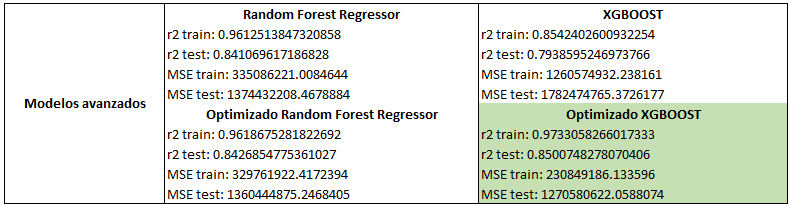

## PARTE C - Interpretación de modelos

#### De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

#### -¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

In [ ]:
importances=model.best_estimator_.feature_importances_

In [ ]:
import matplotlib.pyplot as plt

tree_columns = np.arange(0,len(model.best_estimator_.feature_importances_))
plt.figure(figsize=(20,4))
sns.barplot(tree_columns,importances)
plt.title('Importancia de los features')
plt.xticks(range(len(X.columns)),X.columns.values,rotation=90)
plt.show()

<font color=red>
Partiendo del hecho que el modelo XGBOOST con optimización de hiperparámetros fue el modelo que arrojó mejor score y menor error, se calcularon las características más importantes (features) donde las tres principales fueron rooms, surface_total y casa. En base al primer proyecto, existe cierta similitud en el mapa de calor ya que rooms y surface_total estaban dentro las mayores magnitudes de relación existente con la variable Precio (variable que iba a predecir). Para el modelo XGBOOST la variable casa es una de las nuevas features que se incluyeron para entrenar el modelo.
</font>

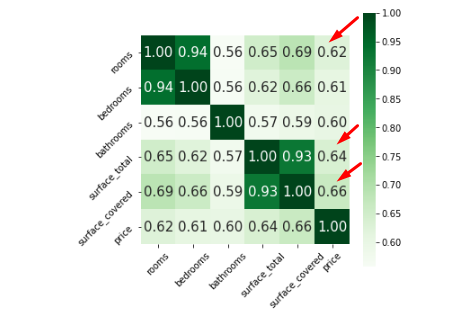

<font color=green>
El hecho de incluir más variables a cualquiera de los modelos avanzados (en este caso tipo de propiedad y l3 que es el barrio) ayudaron a los cálculos para predecir mejor el precio de una propiedad.
Considero que escalar los datos es un plus y la validación cruzada es necesaria en entornos donde el objetivo principal es la predicción y se quiere estimar la precisión de un modelo que se llevará a cabo a la práctica. Independiente del modelo, hay ventajas y desventajas. En mi caso, probar con GridSearchCV no fue posible porque se colgó mi pc, así que por rendimiento computacional, se trabajó RandomizedSearchCV.
</font>

#### -¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

<font color=red>
Distribución de error en modelo XGBOOST.
</font>

In [ ]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.distplot((y_train) - (y_train_pred).reshape(-1,1), bins = 20, label = 'train')
sns.distplot((y_test) - (y_test_pred).reshape(-1,1), bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

<font color=red>
Conclusiones en gráfico de errores y gráfico (cómo da la predicción en función del real):
</font>

<font color=red>
Distribución de error en modelo XGBOOST.
</font>
Los errores RMSE representan el error global del regresor. Son similares tanto para test como para train, indicando que no hay un gran sobreajuste.


Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos. Esto es un indicador de que estamos aproximando a nuestros datos de manera correcta.


En el gráfico  𝑦  vs  𝑦𝑝𝑟𝑒𝑑𝑖𝑐ℎ𝑜  para el conjunto de test, todos los puntos están cerca de la diagonal (la relación  𝑦=𝑥 ), ¡que es lo que esperamos para un buen regresor! Además, el error parece ser similar en todo el rango de posibles valores

## DESAFÍO OPCIONAL

#### Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?